In [1]:
'''
Reads in the ORB descriptor data and trains a SVM classifier
'''

import os
import lib.svm as svm
import lib.utils as utils
import matplotlib.pyplot as plt

base_directory = '/root/bryton/aquabyte_sealice'

annotations_file = '%s/annotations.csv' % (base_directory, )

model_directory = '%s/models' % (base_directory, )
orb_output_directory = '%s/orb_output' % (base_directory, )
svm_output_directory = '%s/svm_output' % (base_directory, )
descriptor_type = 'ORB'
train_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

try: 
    os.makedirs(svm_output_directory)
except OSError:
    if not os.path.isdir(svm_output_directory):
        raise

Adding 8 lice feature descriptors: 1 -> 9
Adding 18 lice feature descriptors: 9 -> 27
Adding 13 lice feature descriptors: 27 -> 40
Adding 10 lice feature descriptors: 40 -> 50
Adding 26 lice feature descriptors: 50 -> 76
Adding 14 lice feature descriptors: 76 -> 90
Adding 15 lice feature descriptors: 90 -> 105
Adding 19 lice feature descriptors: 105 -> 124
Adding 23 lice feature descriptors: 124 -> 147
Adding 17 lice feature descriptors: 147 -> 164
Adding 12 lice feature descriptors: 164 -> 176
176 lice feature descriptors
Adding 10 nonlice feature descriptors: 1 -> 11
Adding 7 nonlice feature descriptors: 11 -> 18
Adding 12 nonlice feature descriptors: 18 -> 30
Adding 15 nonlice feature descriptors: 30 -> 45
Adding 4 nonlice feature descriptors: 45 -> 49
Adding 4 nonlice feature descriptors: 49 -> 53
Adding 9 nonlice feature descriptors: 53 -> 62
Adding 7 nonlice feature descriptors: 62 -> 69
Adding 8 nonlice feature descriptors: 69 -> 77
76 nonlice feature descriptors
Training model


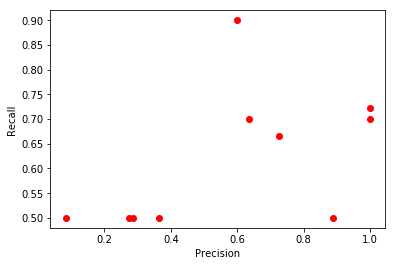

In [3]:
sealice_SVM_trainer = svm.SealiceSVMTrainer(model_directory, orb_output_directory, svm_output_directory, descriptor_type, train_indices)

svm_model_filepath = sealice_SVM_trainer.prepare_data_and_train(True)

print svm_model_filepath

precision_list = []
recall_list = []

annotations = utils.get_lice_annotations_from_file(annotations_file)

for i in xrange(10):
    annotations_subset = annotations[20 * i: 20 * (i + 1)]
    results = svm.predict_sealice(svm_model_filepath, annotations_subset, False)

    precision_list.append(results['precision'])
    recall_list.append(results['recall'])

plt.plot(precision_list, recall_list, 'ro')
plt.xlabel('Precision')
plt.ylabel('Recall')

plt.show()